<h1><center> Customer Segmentation of Credit Card Users </center></h1>

### Outline

**i. Exploratory Data Analysis (EDA)**
- Missing value, Outliers handle
- Correlation matrix

**ii. Clustering methods**
- Dimension reduction: PCA and Plot of Cumulative Variance Explained by Principal components
- Hierarchical clustering (Dendogram), Kmeans (Elbow, Silhouette Method)
- DBSCAN, Spectral clustering
- Gaussian Mixture Model with four covariance types and BIC, AIC score

**Some clustering methods:**

1. Hierarchical Clustering
- Builds a tree (dendrogram) of nested clusters

- No need to predefine number of clusters (can “cut” tree later)

- Works with any distance metric

- Good for: small–medium datasets, visual structure

- e.g., Agglomerative (bottom-up) – most common; Divisive (top-down)

2. Centroid-based Clustering
- Fast, simple, assumes spherical clusters

- Must choose number of clusters k

- e.g., K-Means, K-Medoids

3. Model-based Clustering
- Probabilistic, flexible shapes
- e.g., Gaussian Mixture Model (GMM)

4. Density-based Clustering
- Groups dense regions, ignores noise/outliers.

- Finds irregular shapes automatically, no need for k
- e.g., DBSCAN, HDBSCAN

5. Graph-based Clustering (Spectral..)


6. Grid-based Clustering (STING,..)


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d as Axes3D
import seaborn as sns 
import plotly.express as px 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch 
from sklearn.decomposition import PCA 
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

import warnings 
warnings.filterwarnings("ignore")

# i. EDA

In [71]:
df = pd.read_csv("CC GENERAL.csv")
df
#df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [72]:
df.shape

(8950, 18)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [74]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [75]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

One value null in CREDIT_LIMIT and 313 in MINIMUM_PAYMENTS

In [76]:
df = df.dropna(subset=['CREDIT_LIMIT'])

In [77]:
# Check PAYMENTS and MINIMUM_PAYMENTS
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8919,0.000000,NaN
8929,0.000000,NaN
8935,0.000000,NaN
8944,0.000000,NaN


- For those who have payments = 0 we should fill minimum_payments = 0
- Others: Common method: Fill with median or mean. Here Median is preferred since payment data are usually skewed

In [78]:
# Fill NaN in 'minimum_payments' with 0 where 'payments' equals 0
df.loc[df['PAYMENTS'] == 0, 'MINIMUM_PAYMENTS'] = df.loc[df['PAYMENTS'] == 0, 'MINIMUM_PAYMENTS'].fillna(0)

In [79]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df = df.drop('CUST_ID', axis=1)

Common outlier detection methods:

1. Statistical methods

Z-score: Outliers have |Z| > 3 (far from mean).

IQR (Interquartile Range): Outliers lie below Q1 – 1.5×IQR or above Q3 + 1.5×IQR.

2. Visualization

Boxplot: Shows outliers as isolated points.

Scatterplot / Pairplot: Detect visually distant points.

3. Model-based

Isolation Forest – isolates anomalies using tree splits.

One-Class SVM – learns boundary of normal data.

DBSCAN – marks low-density points as outliers.
Use IQR or Z-score for simple numeric data; model-based methods for high-dimensional data.

Here we use boxplot to detect outliers

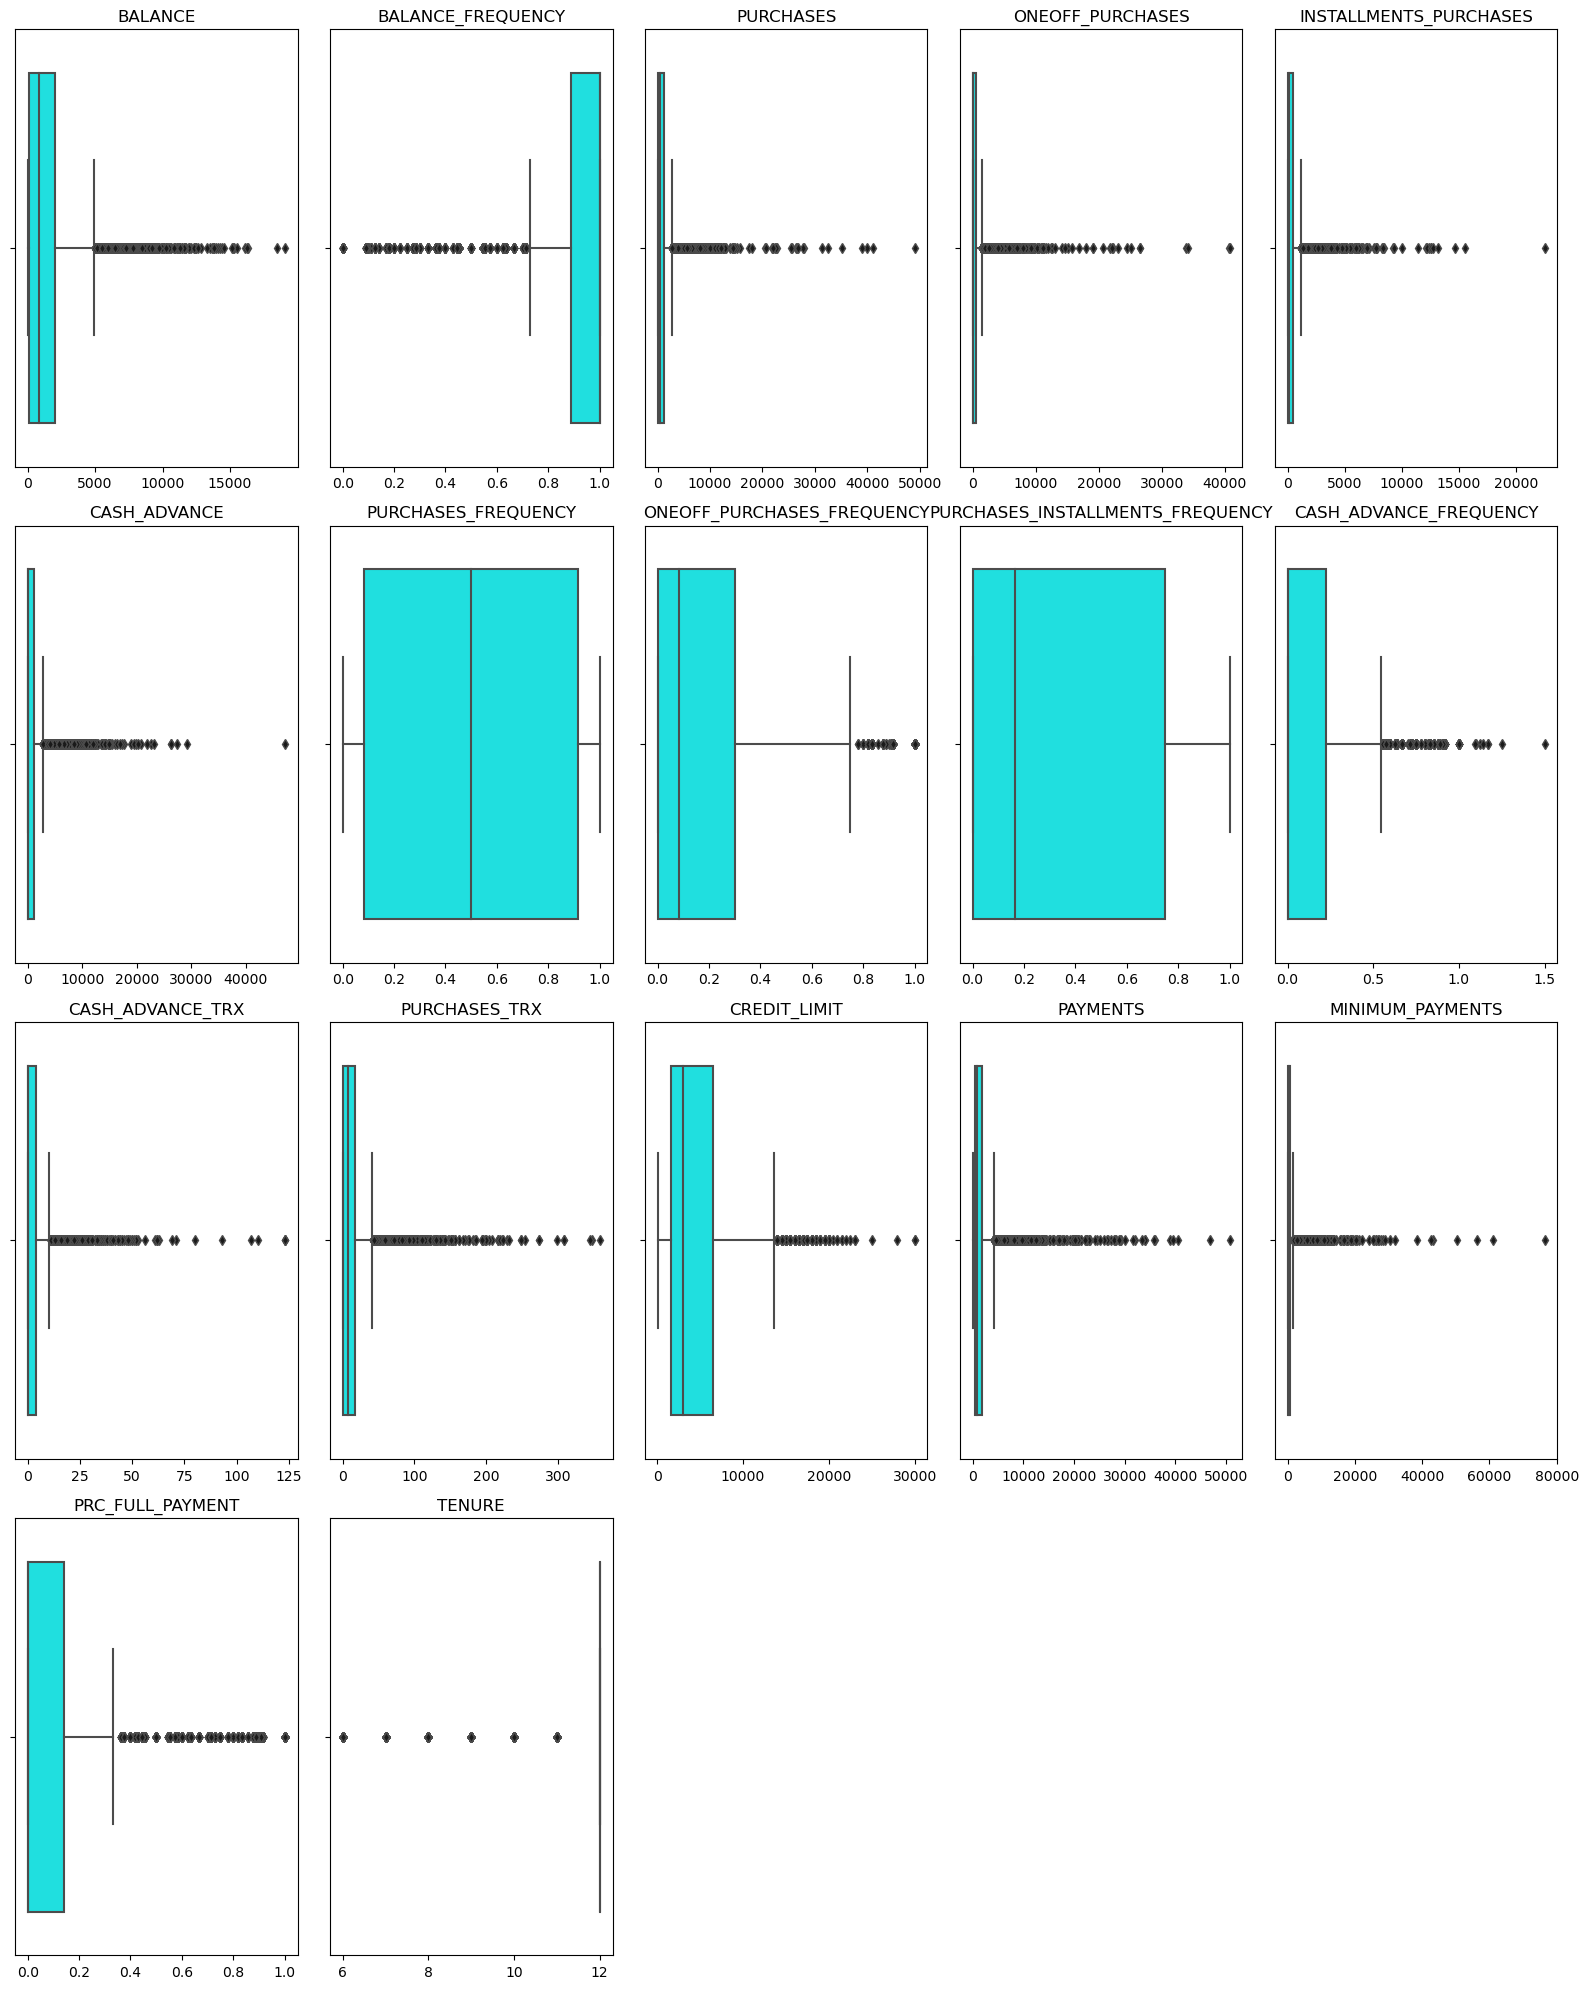

In [80]:
#Boxplots to see outliers

fig, axes = plt.subplots(4, 5, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(df.columns):  
    sns.boxplot(x=df[col], color='aqua', 
                flierprops=dict(markerfacecolor='0.1', markersize=5), 
                ax=axes[i])
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel("")  
    
# Hide the 3 unused subplots 
for i in range(17, 20):
    axes[i].axis('off')
    
plt.tight_layout()
plt.show()

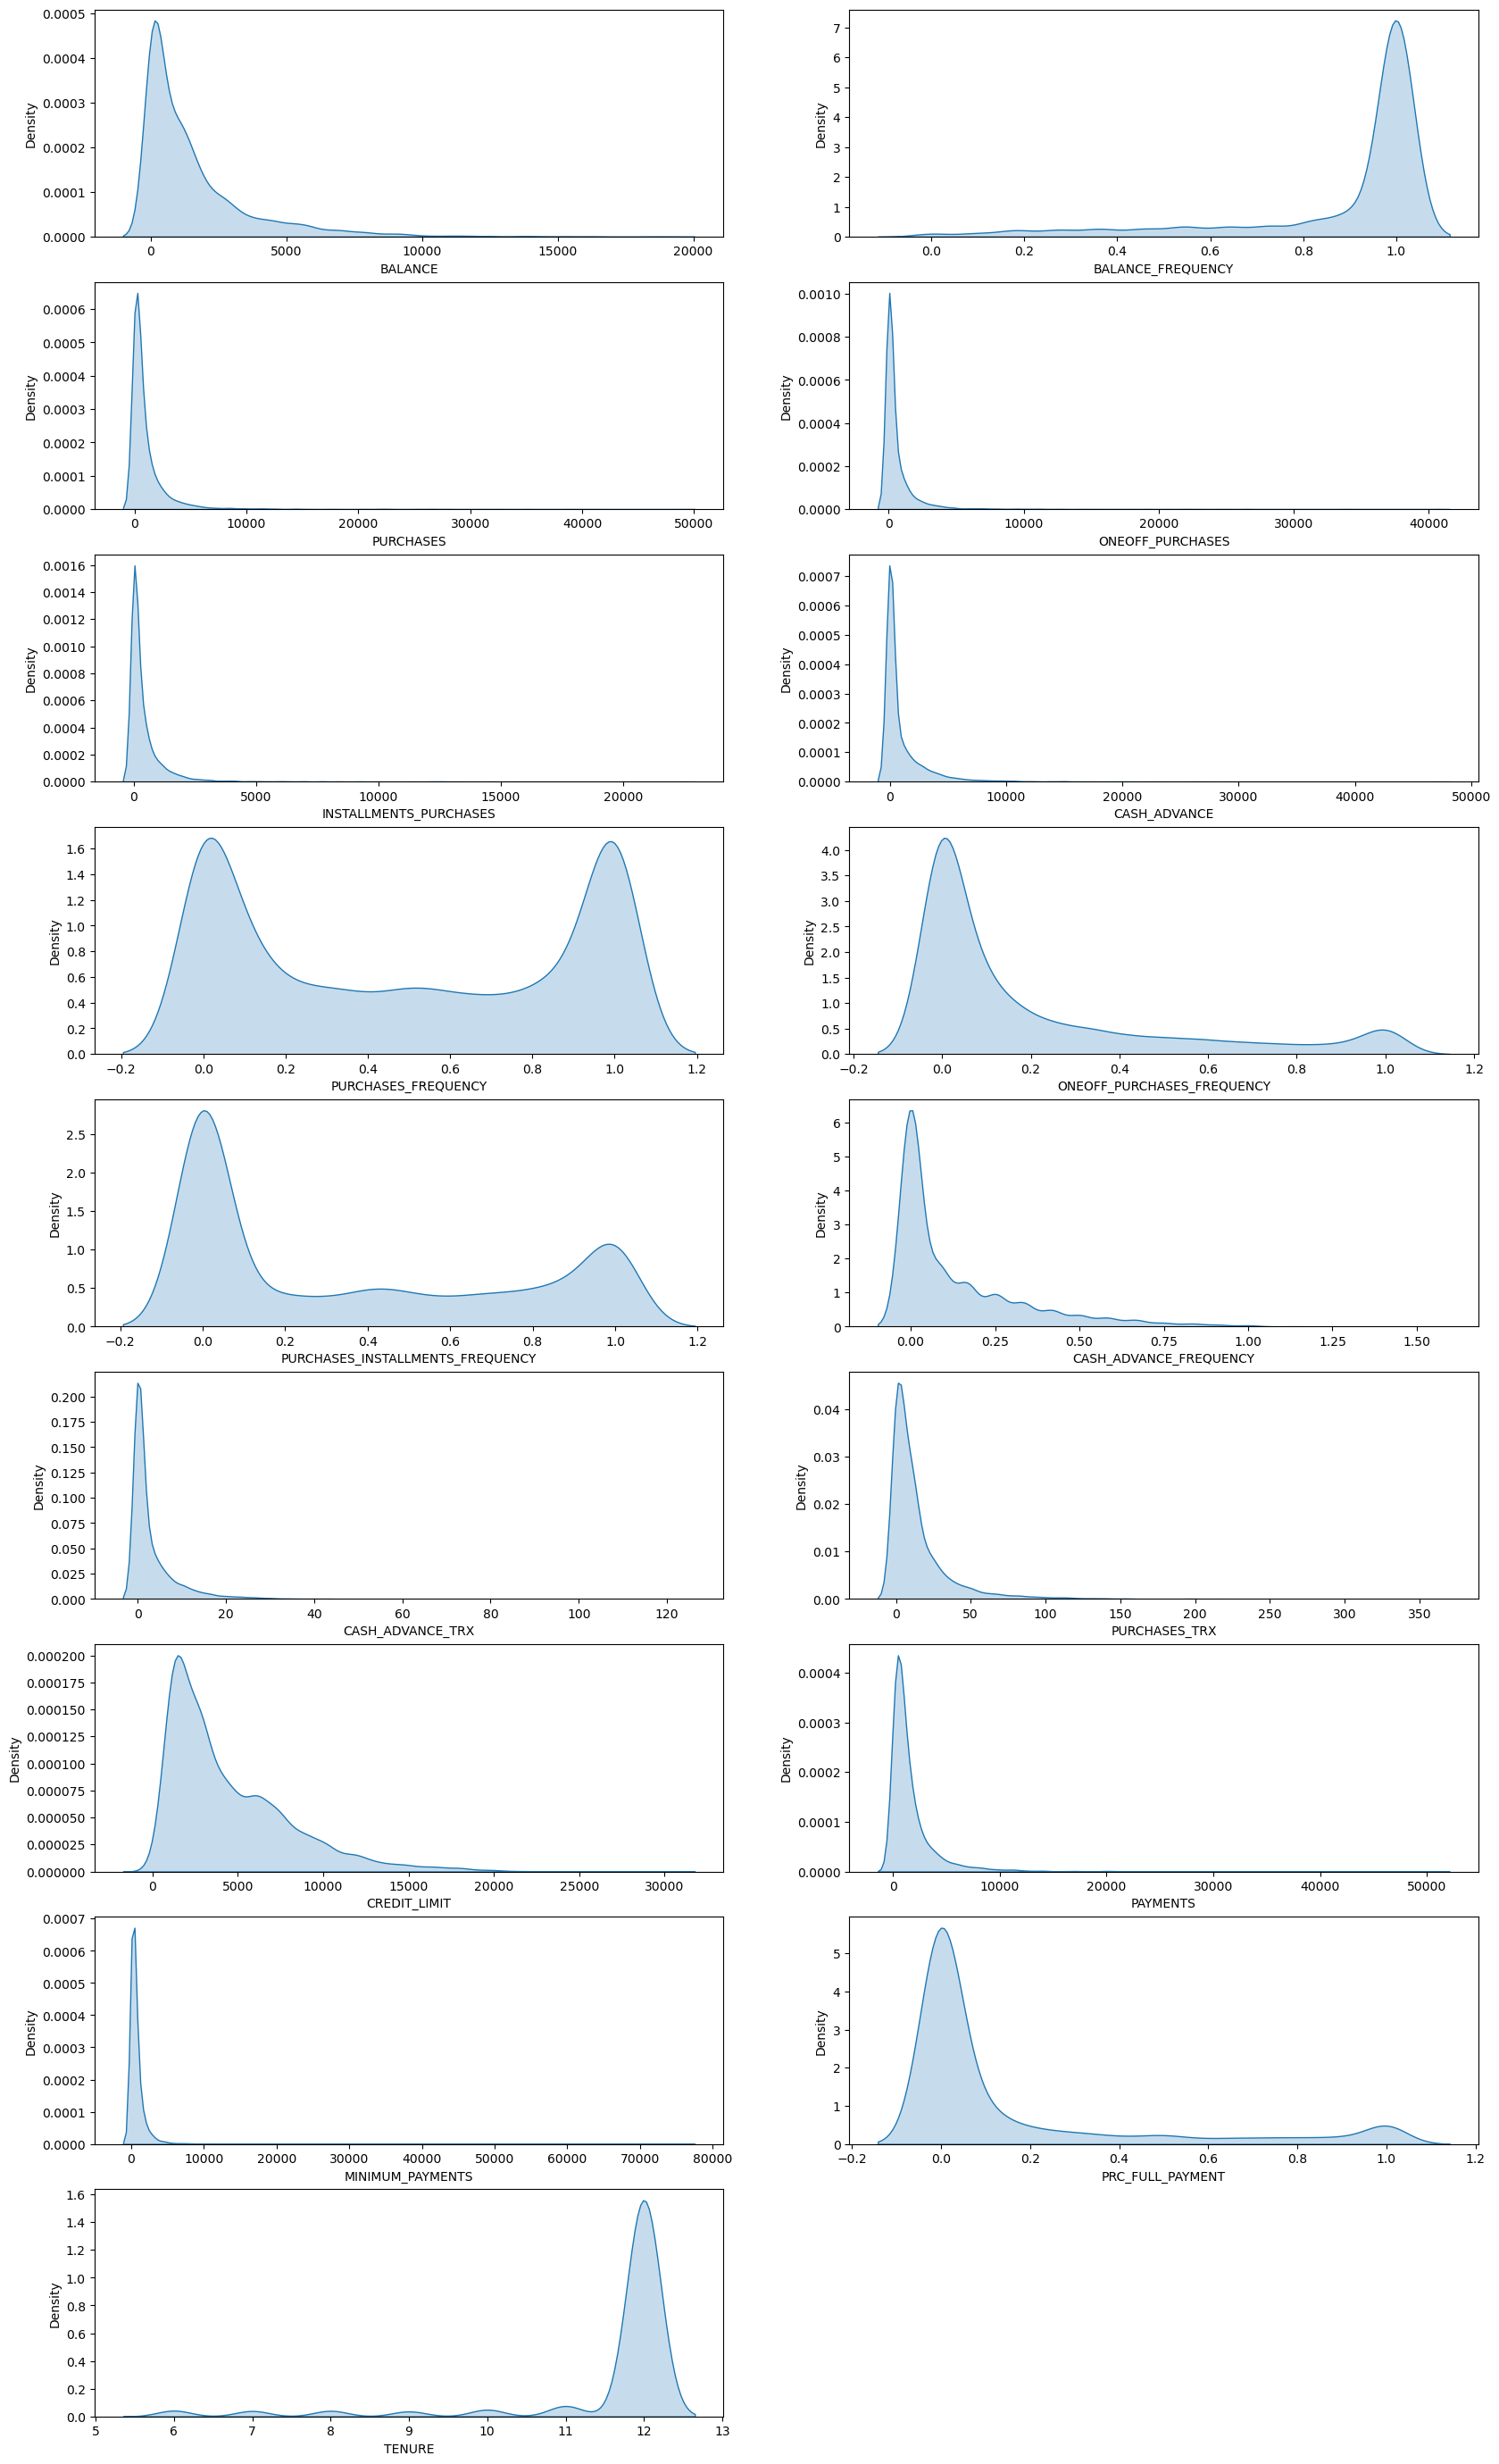

In [81]:
#KDE to see distribution
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], fill=True, ax=ax)
        plt.xlabel(col)
        
plt.show()

In [82]:
#From boxplots, we decide to remove some outliers
df = df[(df['BALANCE']<15000)]
df = df[(df['PURCHASES']<40000)]
df = df[(df['ONEOFF_PURCHASES']<30000)]
df = df[(df['INSTALLMENTS_PURCHASES']<20000)]
df = df[(df['CASH_ADVANCE']<40000)]
df = df[(df['MINIMUM_PAYMENTS']<60000)]

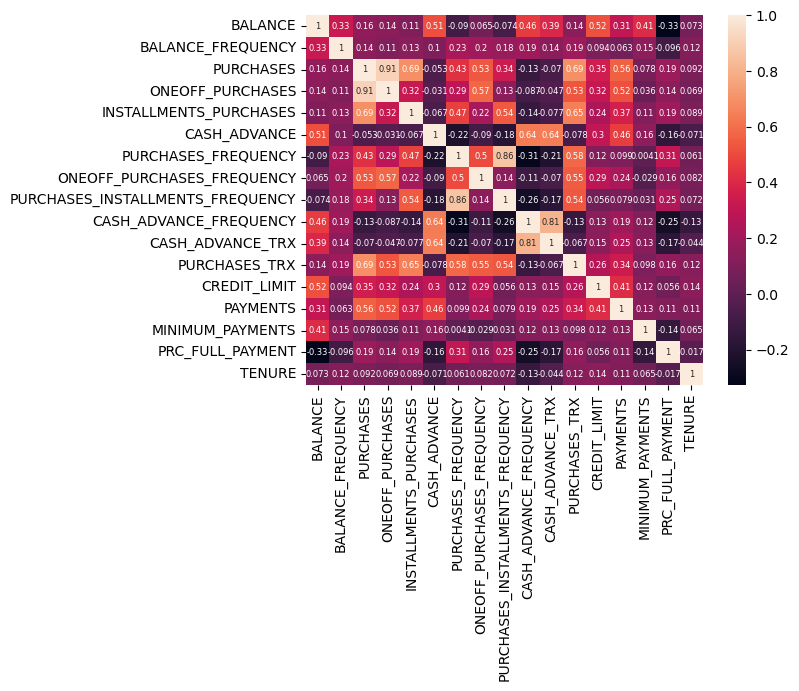

In [83]:
#Correlation Matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 6})
plt.show()

**We have a lot of features (17) with strong correlation between features:**

- Very Strong correlation:  Purchases and one-off Purchases (>0.9); Purchases installments frequency and Purchase frequency (>0.8),  Cash in advance - total transactions and Cash advance frequency(>0.8), Installment purchases and Purchases (~0.7), Installment purchases and Purchase total transactions (0.65), Cash advance and Cash advance frequency (>0.6)
- Strong correlation: Purchases and Payment, Balance and credit limit,...

**Therfore, we will use PCA later to**:
- Combine correlated features into fewer uncorrelated components that capture most of the variance 

- Reduce the dimension, removes redundancy, and keeps the most important information, making models faster and less prone to overfitting

# ii. Clustering methods

1. Dimension reduction: PCA and Plot of Cumulative Variance Explained by Principal components
2. Hierarchical clustering (Dendogram), Kmeans (Elbow, Silhouette Method)
3. DBSCAN, Spectral clustering
4. Gaussian Mixture Model with four covariance types and BIC score

In [84]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,294.587445,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


PCA components kept for 95% variance: 12


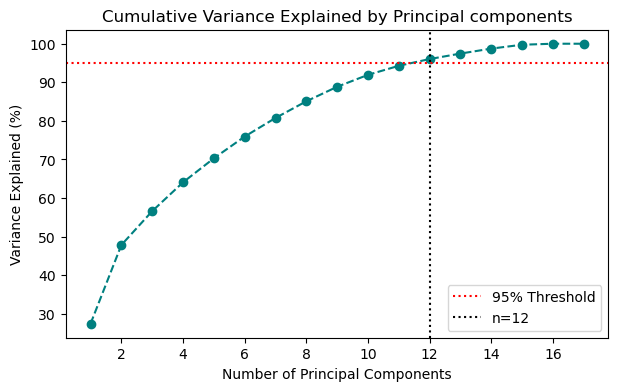

In [85]:
#1. Dimension reduction: PCA and Plot of Cumulative Variance Explained by Principal components

# Standardize features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)

# Fit PCA to find cumulative variance
pca = PCA().fit(X_scaled)
cum_var = np.cumsum(pca.explained_variance_ratio_) * 100

# Determine number of components for 95% variance
n_95 = np.argmax(cum_var >= 95) + 1
X_pca = pca.transform(X_scaled)[:, :n_95]
print(f"PCA components kept for 95% variance: {n_95}")

# Visualization Cumulative Variance Explained by Principal components
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', color='teal', linestyle='--')
plt.axhline(y=95, color='r', linestyle=':', label='95% Threshold')
plt.axvline(x=n_95, color='black', linestyle=':', label=f'n={n_95}')

plt.title("Cumulative Variance Explained by Principal components", fontsize=12)
plt.xlabel("Number of Principal Components")
plt.ylabel("Variance Explained (%)")
plt.legend()
plt.show()

In [86]:
# Dimension reduction: PCA (keep 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
# print(f"PCA components kept: {X_pca.shape[1]}")

We reduce the number of components from 17 to 12. PCA with 12 principal components explains about 95% total variance

In [87]:
#2. Hierarchical clustering (Dendogram), Kmeans (Elbow, Silhouette Method)

**Hierarchical Clustering**: This technique organizes data into a tiered structure, typically visualized through a tree-like diagram called a dendrogram. It follows two main strategies:

- Agglomerative (Bottom-Up): Every data point begins as its own individual cluster; these are progressively merged into larger groups as you move up the hierarchy.

- Divisive (Top-Down): All data points start in a single massive cluster, which is then repeatedly split into smaller groups as you move down the hierarchy.

**KMeans Clustering**: method of clustering which aims to divide the n observations into k clusters. Following, each observation will belong to the cluster with the nearest mean (cluster centroid), serving as a prototype of the cluster

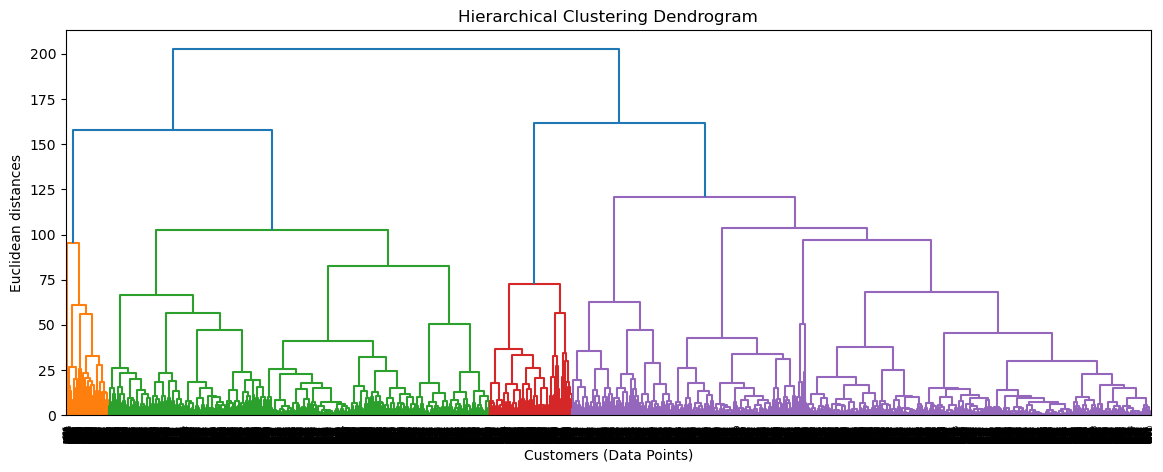

In [88]:
# 2 a Hierarchical Clustering Dendrogram
plt.figure(figsize=(14, 5))
sch.dendrogram(sch.linkage(X_pca, method='ward',metric='euclidean'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers (Data Points)')
plt.ylabel('Euclidean distances')
plt.show()

We can roughly identify 4 - 6 customer groups (based on the color clusters) which may represent different spending behaviors (e.g., high spenders, low-active users, etc.): Orange, Green, Red and Purple cluster (possible 2–3 subgroups)
- **Small orange cluster** (left): Tiny, distinct outlier segment.
- **Large green cluster**: Dominant group — likely typical/average customers (majority behavior).
- **Red cluster**: Medium-sized, separate group.
- **Multiple purple clusters** (right): Several smaller, varied subgroups.
- Higher blue merges indicate broader similarities if fewer clusters are desired.

**Distance & Similarity**

- Vertical Axis: Represents the distance (dissimilarity). The higher the horizontal link, the more different the groups are. For example, the purple group is significantly different from the others, as it only joins the rest of the data at the very top (distance > 200).

- Horizontal Axis: Represents individual credit card users. They are so numerous they appear as a solid black blur at the bottom.

- We may add a Horizontal cut line e.g y = 130, this would formally "snip" the tree to create a specific number of clusters for further analysis

**Segment Characteristics**
- Purple Segment: This is your largest and most diverse group. It has several sub-segments, suggesting it might contain your "average" or "standard" users.

- Orange & Green Segments: These are more tightly packed at the bottom, meaning the users within these groups are very similar to one another.

- Red Segment: This acts as a middle-ground group between the very distinct left and right clusters.

Text(0.5, 0, 'Number of Clusters (k)')

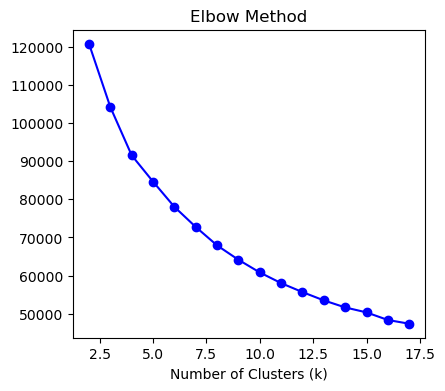

In [89]:
# 2 b K-MEANS: FIND OPTIMAL K (ELBOW METHOD)
inertia = []
K_range = range(2, 18)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X_pca)
    inertia.append(model.inertia_)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')

Optimal K by Silhouette: 3


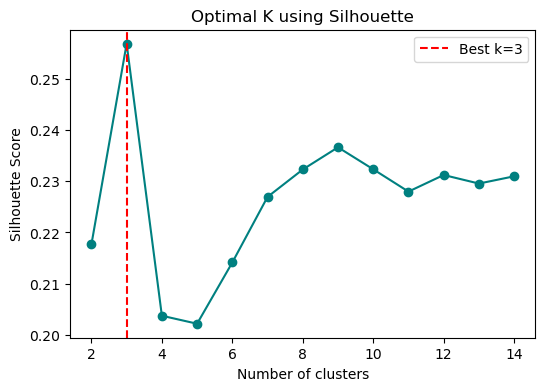

In [90]:
# 2b  Find optimal k using Silhouette 

k_range = range(2, 15)  
# starting from 2 is mandatory and checking up to 10 is enough for business segments, here we try max k = 14
sil_scores = []

for k in k_range:
    labels = KMeans(n_clusters=k, random_state=42, n_init=10).fit_predict(X_pca)
    sil_scores.append(silhouette_score(X_pca, labels))

best_k = k_range[np.argmax(sil_scores)]
print(f"Optimal K by Silhouette: {best_k}")

plt.figure(figsize=(6,4))
plt.plot(k_range, sil_scores, 'o-', color='teal')
plt.axvline(best_k, color='red', linestyle='--', label=f'Best k={best_k}')
plt.xlabel('Number of clusters'); plt.ylabel('Silhouette Score')
plt.title('Optimal K using Silhouette'); plt.legend(); plt.show()

**From the Elbow and Silhouette Method (of Kmeans), we choose 3 clusters for Kmeans, Hierarchical and Spectral clustering**

In [91]:
# 3 c Clustering methods
kmeans = KMeans(n_clusters= best_k, random_state=42, n_init=10)
hierarchical = AgglomerativeClustering(n_clusters= best_k)
dbscan = DBSCAN(eps=1.5, min_samples=5)
spectral = SpectralClustering(n_clusters = best_k, random_state=42, affinity='nearest_neighbors')

labels1 = {
    "KMeans": kmeans.fit_predict(X_pca),
    "Hierarchical": hierarchical.fit_predict(X_pca)
} 
labels2 = {
    "DBSCAN": dbscan.fit_predict(X_pca),
    "Spectral": spectral.fit_predict(X_pca)
}

# ---- Silhouette scores (Printing for KMeans and Hierarchy) ----
print(f"KMeans Silhouette Score: {silhouette_score(X_pca, labels1['KMeans']):.3f}")
print(f"Hierarchical Silhouette Score: {silhouette_score(X_pca, labels1['Hierarchical']):.3f}")

KMeans Silhouette Score: 0.257
Hierarchical Silhouette Score: 0.185


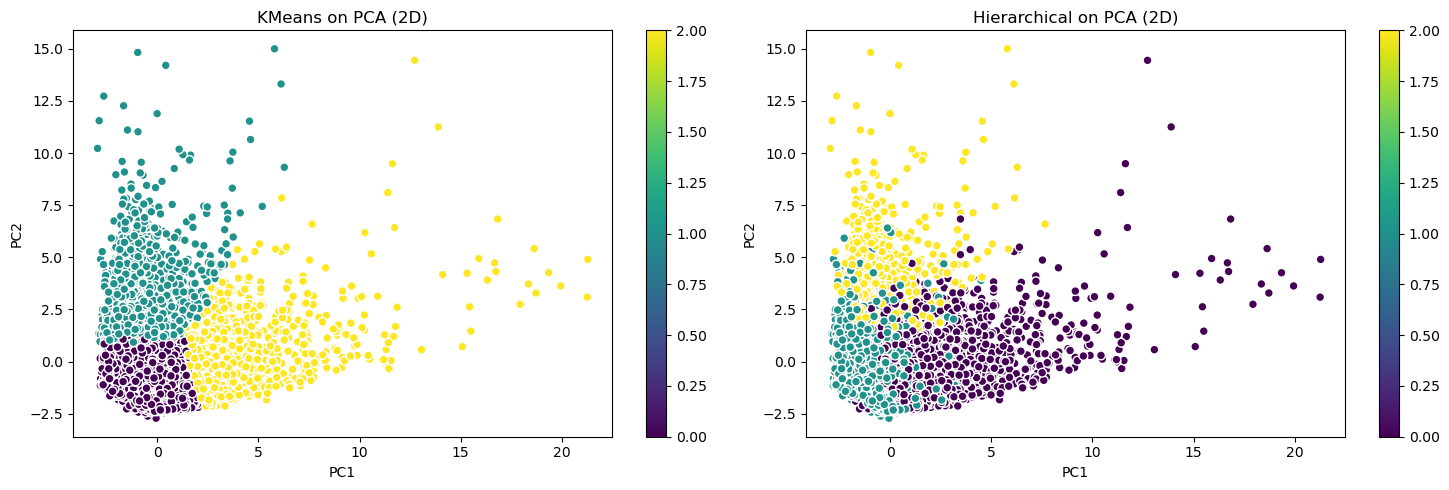

In [92]:
# 2D Visualization 
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for ax, (name, labels) in zip(axes, labels1.items()):
    sc = ax.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=40, edgecolors='w')
    ax.set_title(f"{name} on PCA (2D)")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    plt.colorbar(sc, ax=ax)
plt.tight_layout()
plt.show()

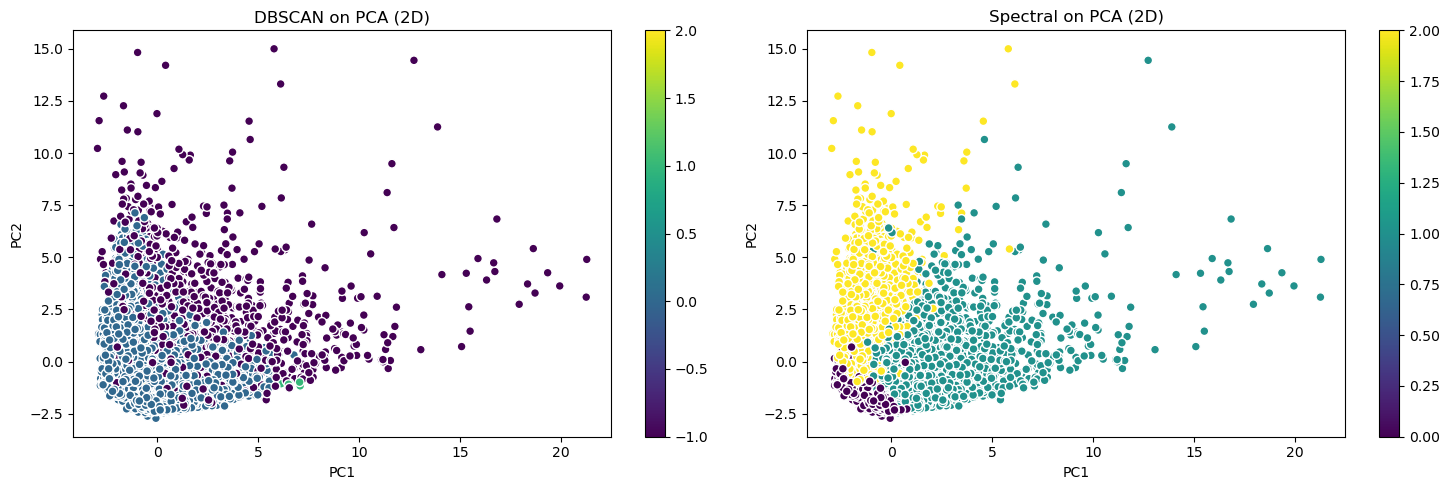

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for ax, (name, labels) in zip(axes, labels2.items()):
    sc = ax.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=40, edgecolors='w')
    ax.set_title(f"{name} on PCA (2D)")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    plt.colorbar(sc, ax=ax)
plt.tight_layout()
plt.show()

DBSCAN identifies 2 clusters, unlike other methods that yield 3 clusters (where the cluster count was set to the optimal KMeans value determined by the Silhouette score).

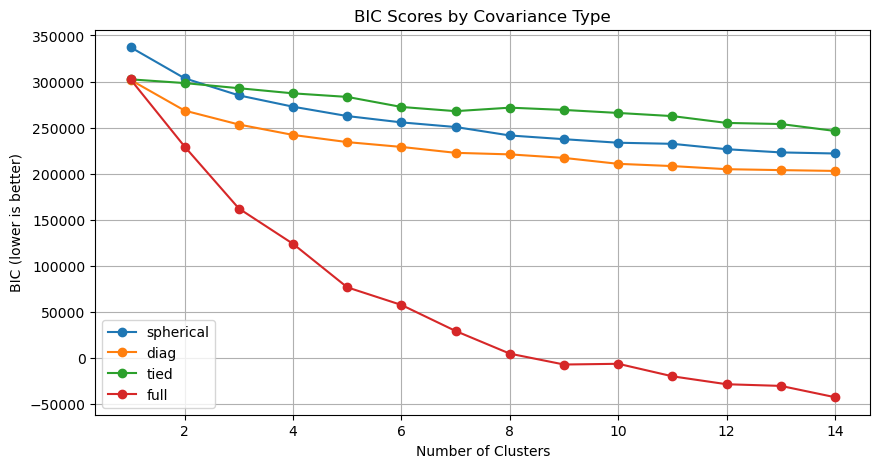

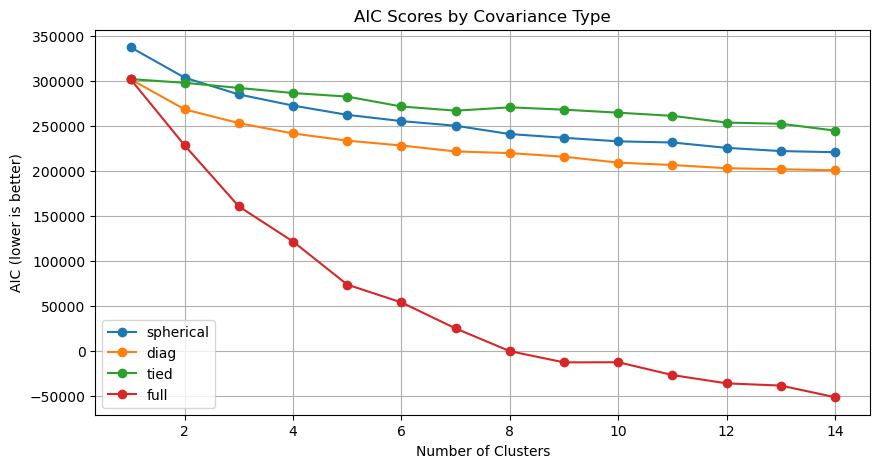

In [94]:
# 4 Gaussian Mixture Model -  BIC and AIC score
n_components = range(1, 15)  # number of clusters 
cov_types = ['spherical', 'diag', 'tied', 'full']

bic = {cov: [] for cov in cov_types}
aic = {cov: [] for cov in cov_types}

for cov in cov_types:
    for k in n_components:
        gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=42)
        gmm.fit(X_pca)
        bic[cov].append(gmm.bic(X_pca))
        aic[cov].append(gmm.aic(X_pca))

# Plot BIC
plt.figure(figsize=(10, 5))
for cov in cov_types:
    plt.plot(n_components, bic[cov], marker='o', label=f'{cov}')
plt.title('BIC Scores by Covariance Type')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC (lower is better)')
plt.legend(); plt.grid(True); plt.show()

# Plot AIC
plt.figure(figsize=(10, 5))
for cov in cov_types:
    plt.plot(n_components, aic[cov], marker='o', label=f'{cov}')
plt.title('AIC Scores by Covariance Type')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC (lower is better)')
plt.legend(); plt.grid(True); plt.show()

Covariance_type parameter controls the shape, size, and orientation of the clusters.

covariance_type:

- **spherical**:	Each cluster has its own single variance value. Geometry: Circles (2D) or Spheres (3D).	Complexity: Simplest (Fewest parameters).	

- **diag**:	Each cluster has its own variance for each feature, but no correlation.	Geometry: Axis-aligned ellipses (cannot tilt). Complexity:	Medium (Efficient for high dimensions).	

- **tied**:	All clusters share the same shape and orientation.	Geometry: Identical ellipses across all groups.	Complexity: Medium (Useful if clusters look similar).	

- **full**:	Each cluster has its own independent shape and orientation.	Geometry: Tilted ellipses of any size/angle.	Complexity: Most Complex (Most flexible, but high risk of overfitting).	

The Gaussian Mixture Model (GMM) using full covariance and 14 components yields the strongest performance across most tested cluster counts, as evidenced by the lowest BIC and AIC scores.

In [ ]:
'''Use 3D visualization only if the first 3 components together explain >70–80% variance, otherwise 2D plots are usually clearer.'''
# Optional: 3D PCA plot (recommended if variance is high in first 3 PCs). Uncomment the code to run it
# from mpl_toolkits.mplot3d import Axes3D

# pca_3d = PCA(n_components=3)
# X_pca3 = pca_3d.fit_transform(X_scaled)

# fig = plt.figure(figsize=(7,6))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], 
#                 c=labels["KMeans"], cmap='viridis', s=40)
# ax.set_title("KMeans Clustering on 3D PCA")
# ax.set_xlabel("PC1")
# ax.set_ylabel("PC2")
# ax.set_zlabel("PC3")
# plt.colorbar(sc)
# plt.show()